In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df.shape

(1000, 8)

#  check missing values
# duplicates
# data types
# number of unique values
# statistics
# various categories


In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# inisghts 
## there are no missing values

In [11]:
df.duplicated().sum()

0

# there are no duplicates

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# number od unique vqlues of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
# check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# insights
from the above description of data all the mean are close to eachother 
from the above description all the std are close to eachother 
minimum math score =0 , mini reading_score - 17 , min writing = 10

In [21]:
numberical_features =[feature for feature in df.columns if df[feature].dtype!= 'O'] 

In [23]:
categroical_features = [ feature for feature in df.columns if df[feature].dtype=='O']

In [24]:
df['total_score'] = (df['math_score']+ df['reading_score']+df['writing_score'])
df['avg_score'] = (df['total_score']/3)


In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


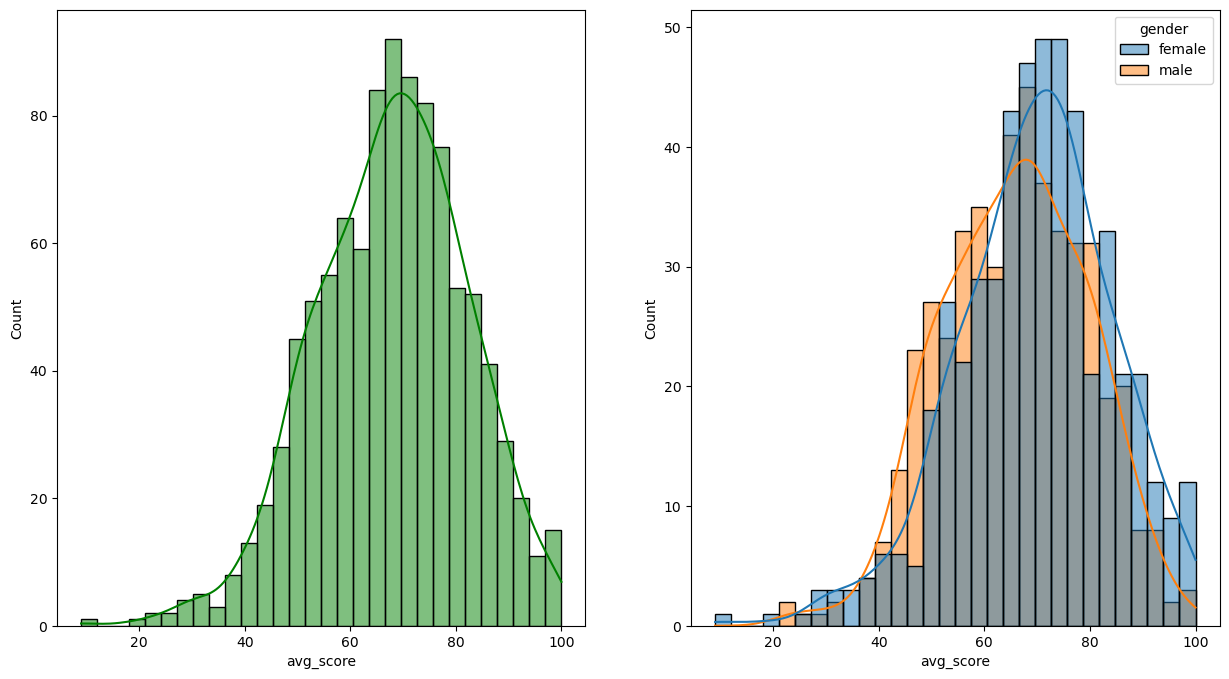

In [32]:
# explore more visualization
fig, axis = plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data = df , x = 'avg_score' , bins = 30 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = df , x = 'avg_score', bins = 30 , kde = True , hue = 'gender')
plt.show()

# isnights 
# females perfrom better than male students 

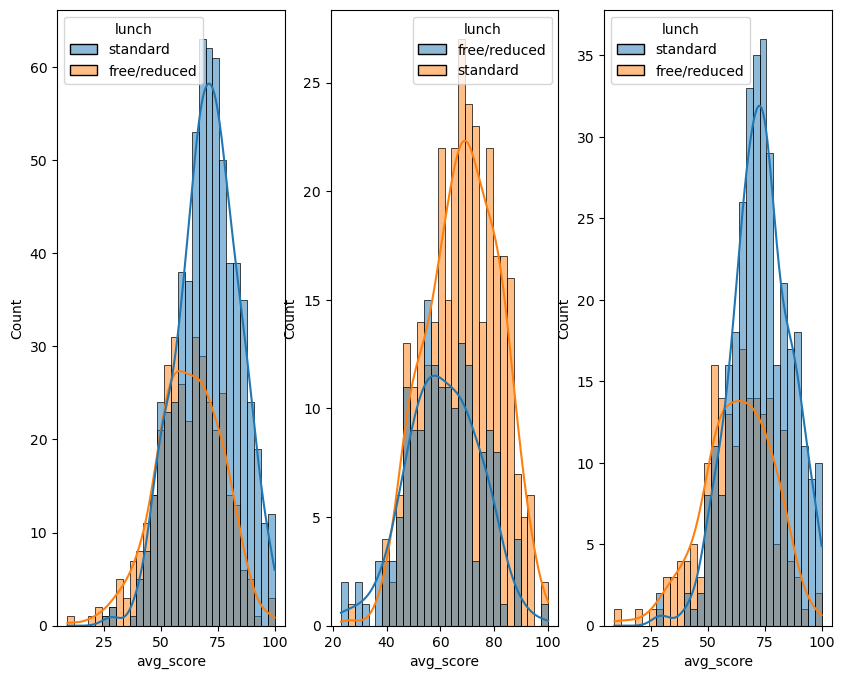

In [39]:
fig , axis = plt.subplots(1,3,figsize=(10,8))
plt.subplot(131)
sns.histplot( data = df , x = 'avg_score' , bins = 30 , kde = True , hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender =='male'] , x = 'avg_score' , bins = 30 , kde = True, hue ='lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'] , x = 'avg_score' , bins = 30 , kde = True , hue ='lunch')
plt.show()

In [ ]:
# insights 
# with standard lunch students perfrom well in exam  in case of both males and femlas 


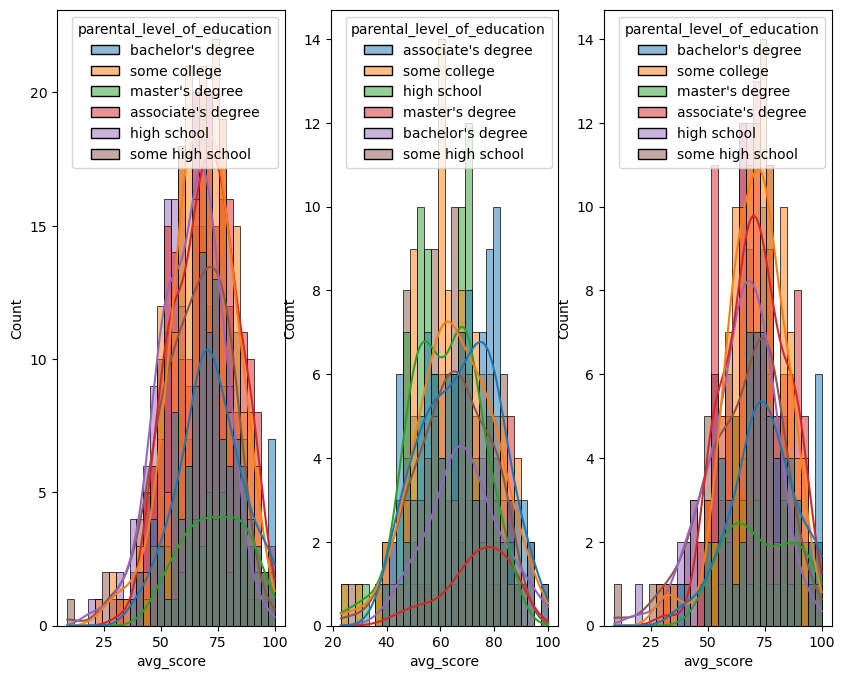

In [41]:
fig , axis = plt.subplots(1,3,figsize=(10,8))
plt.subplot(131)
sns.histplot( data = df , x = 'avg_score' , bins = 30 , kde = True , hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df.gender =='male'] , x = 'avg_score' , bins = 30 , kde = True, hue ='parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'] , x = 'avg_score' , bins = 30 , kde = True , hue ='parental_level_of_education')
plt.show()


# In genarl parental_level_of_education  don't help in students education 
# the avg is increasing towrds  master degrees parents , associate the mail chid perfroms well
# no effects on parental education of female

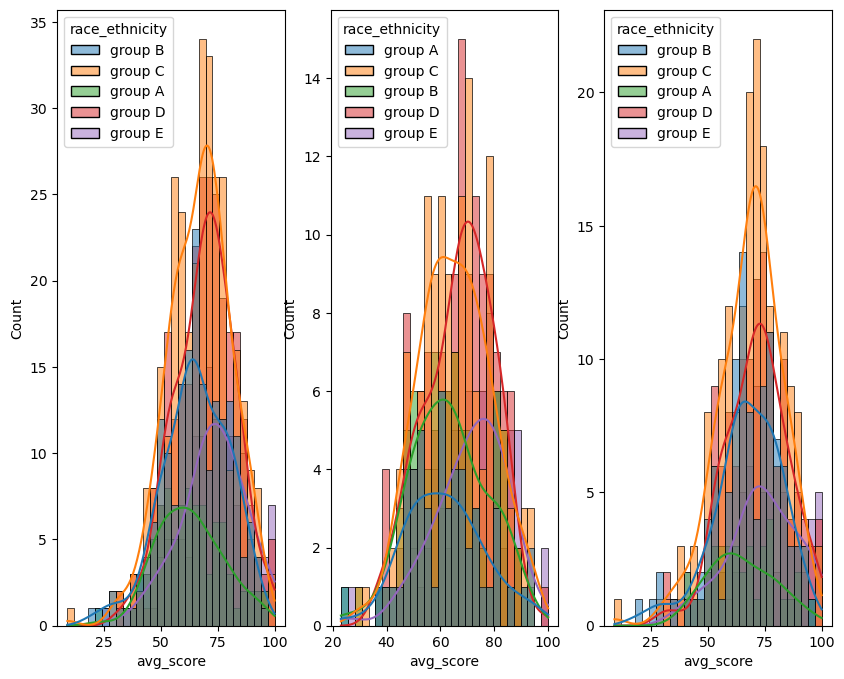

In [42]:
fig , axis = plt.subplots(1,3,figsize=(10,8))
plt.subplot(131)
sns.histplot( data = df , x = 'avg_score' , bins = 30 , kde = True , hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender =='male'] , x = 'avg_score' , bins = 30 , kde = True, hue ='race_ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'] , x = 'avg_score' , bins = 30 , kde = True , hue ='race_ethnicity')
plt.show()

# students of group a and b perfrom poor in both males and females 

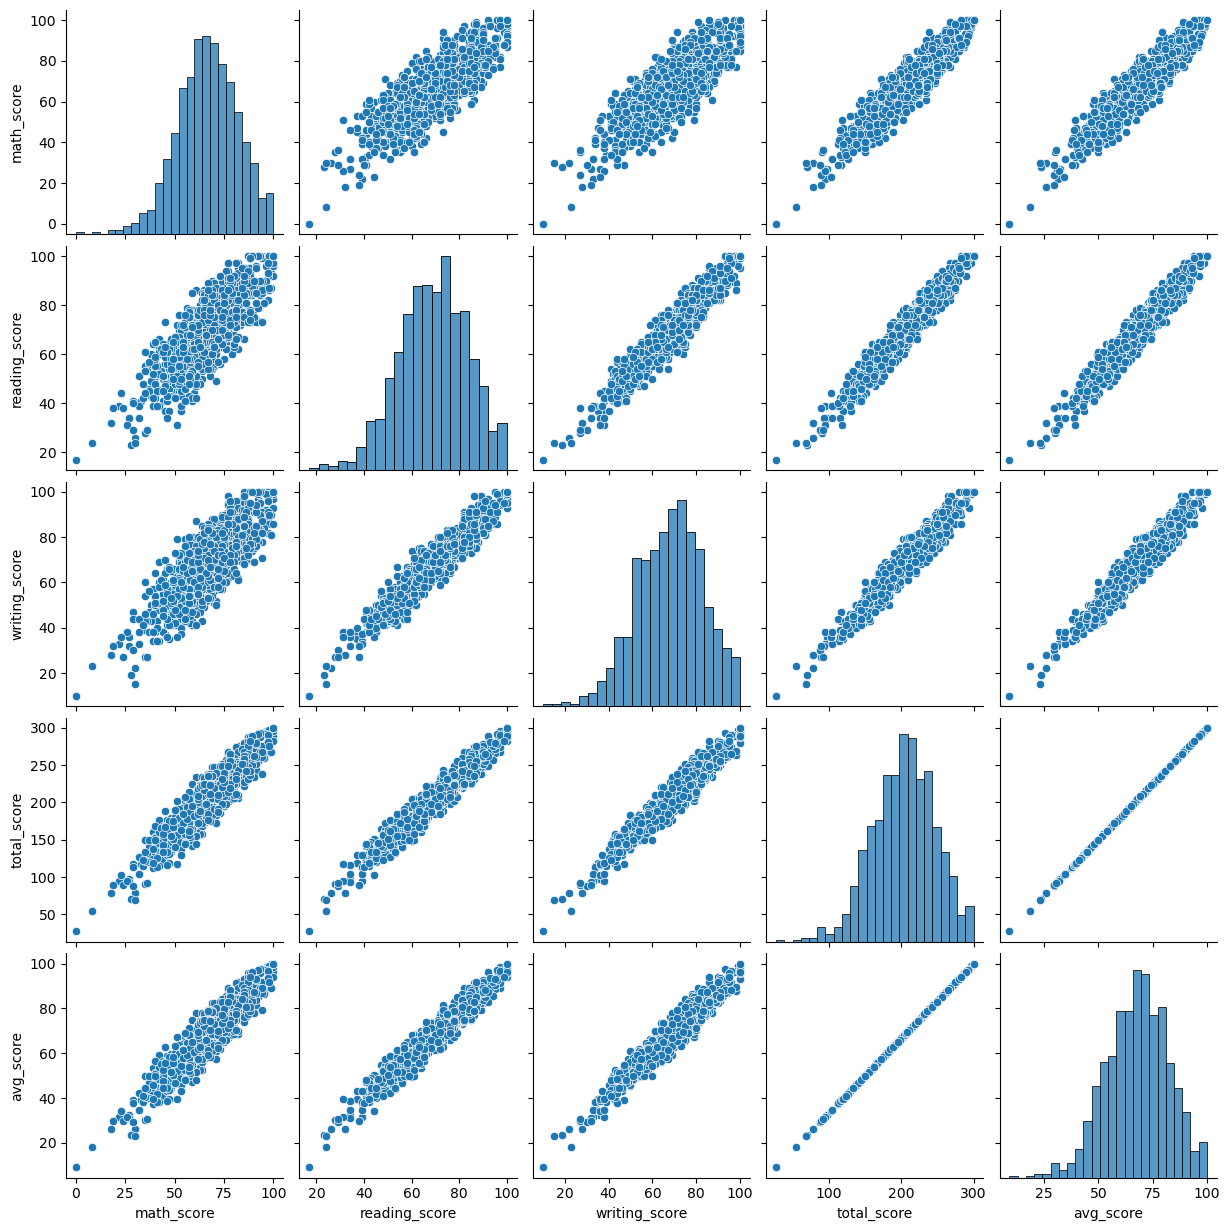

In [44]:
sns.pairplot(df)

<AxesSubplot: >

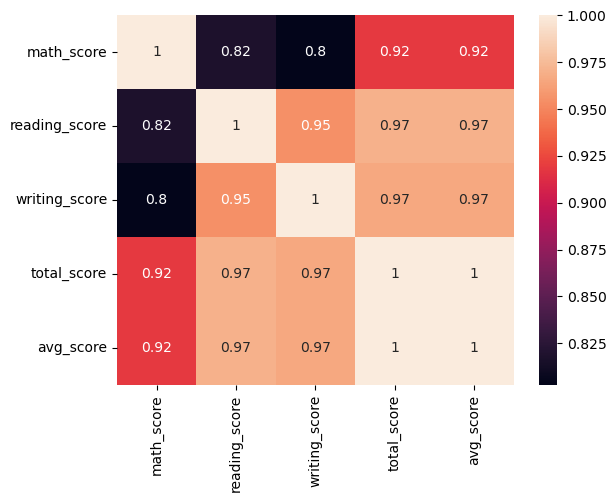

In [45]:
sns.heatmap(df.corr(), annot = True)